## Analysis of the MetOcean Stokes drift data collected on the BBG rooftop

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

with open('/Users/erik/Codes/Stokesdrifters_Wadden/waddendrifters_roof.json') as f:
    data = json.load(f)

Analysis of time between records for each drifter (set at 30 minutes for the first test; 5 minutes for the second test)

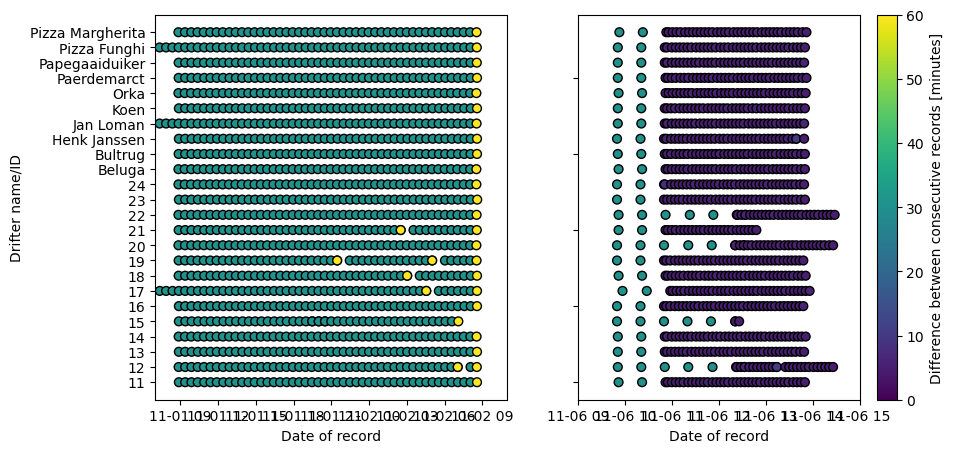

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    dt = np.diff(times)
    ax[0].scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=dt, vmin=0, vmax=60, cmap='viridis', edgecolor='k')
    sc = ax[1].scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=dt, vmin=0, vmax=60, cmap='viridis', edgecolor='k')
ax[0].set_xlim([np.datetime64('2023-11-01 07:00'), np.datetime64('2023-11-02 11:00')])
ax[1].set_xlim([np.datetime64('2023-11-06 09:00'), np.datetime64('2023-11-06 15:00')])
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticklabels([])
plt.colorbar(sc, ax=ax[1], label="Difference between consecutive records [minutes]")
ax[0].set_yticks(range(len(data.keys())), data.keys())
ax[0].set_ylabel('Drifter name/ID')
for i in range(2):
    ax[i].set_xlabel('Date of record')
plt.show()

Analysis of the change in location (GPS Jitter) for each drifter

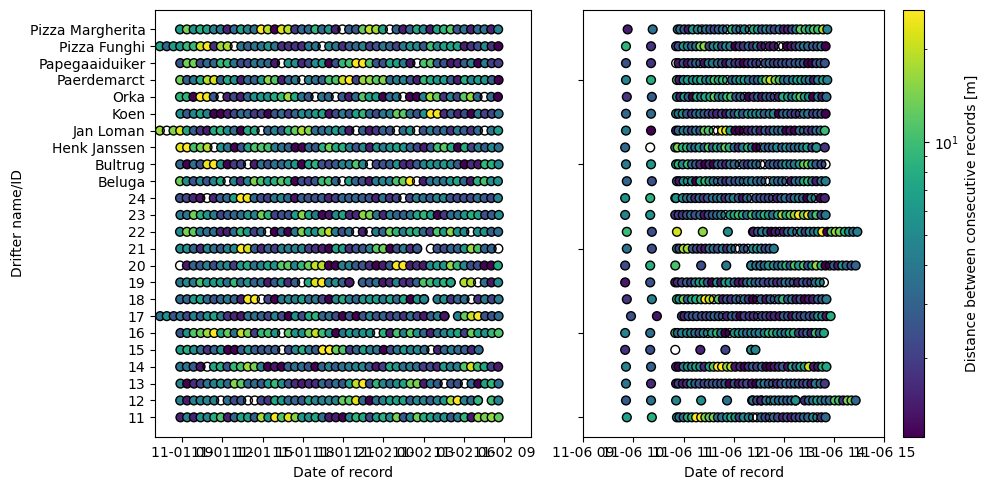

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    dr = np.hypot(np.diff(lats)*1852*60, np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180))
    ax[0].scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=dr, cmap='viridis', edgecolor='k', norm=matplotlib.colors.LogNorm())
    sc = ax[1].scatter(times[:-1], (len(times)*[i])[:-1], s=40, c=dr, cmap='viridis', edgecolor='k', norm=matplotlib.colors.LogNorm())

ax[0].set_xlim([np.datetime64('2023-11-01 07:00'), np.datetime64('2023-11-02 11:00')])
ax[1].set_xlim([np.datetime64('2023-11-06 09:00'), np.datetime64('2023-11-06 15:00')])
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_yticklabels([])
plt.colorbar(sc, ax=ax[1], label="Distance between consecutive records [m]")
ax[0].set_yticks(range(len(data.keys())), data.keys())
ax[0].set_ylabel('Drifter name/ID')
for i in range(2):
    ax[i].set_xlabel('Date of record')

plt.tight_layout()
plt.show()

Analysis of the distribution of GPS jitter, for absolute distances as well as for change in longitude and latitude

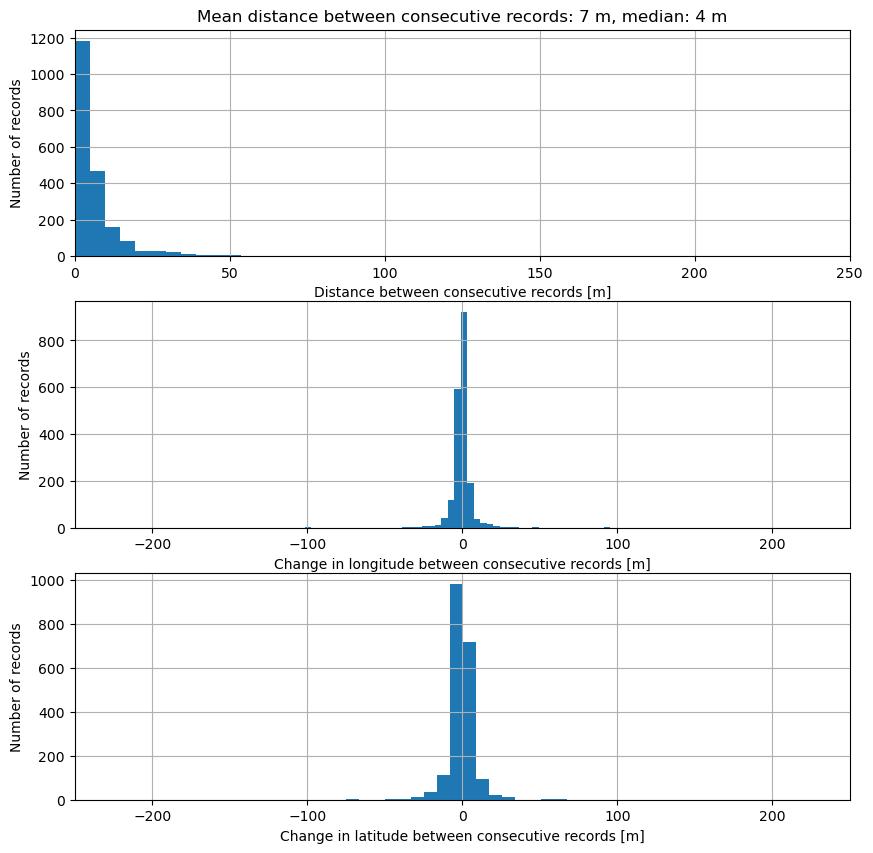

In [4]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
dr = np.array([])
dx = np.array([])
dy = np.array([])
for i, drifter in enumerate(data.keys()):
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    dr = np.append(dr, np.hypot(np.diff(lats)*1852*60, np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)))
    dx = np.append(dx, np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180))
    dy = np.append(dy, np.diff(lats)*1852*60)

ax[0].hist(dr, bins=50)
ax[0].set_xlim([0, 250])
ax[0].set_xlabel('Distance between consecutive records [m]')
ax[0].set_title(f"Mean distance between consecutive records: {np.mean(dr):.0f} m, median: {np.median(dr):.0f} m")

ax[1].hist(dx, bins=50)
ax[1].set_xlim([-250, 250])
ax[1].set_xlabel('Change in longitude between consecutive records [m]')

ax[2].hist(dy, bins=50)
ax[2].set_xlim([-250, 250])
ax[2].set_xlabel('Change in latitude between consecutive records [m]')

for a in ax:
    a.grid()
    a.set_ylabel('Number of records')
plt.show()

Analysis of the orientation of the drifters (up or down)

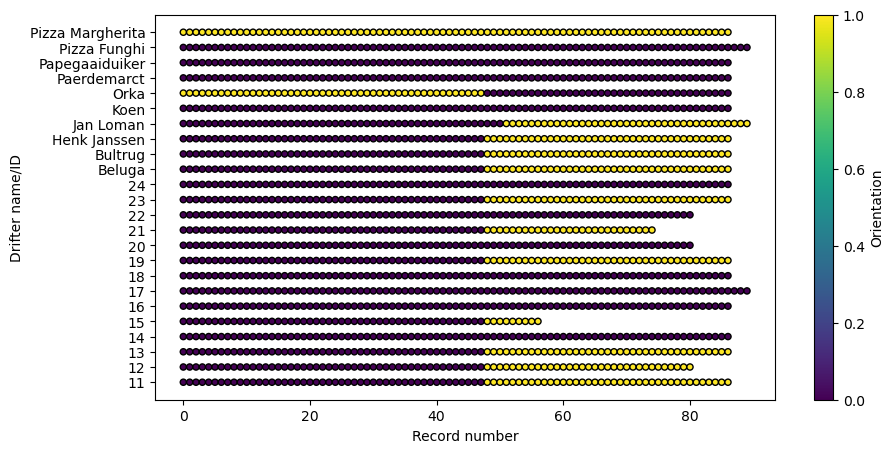

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    orientation = [d[3] for d in data[drifter]]
    plt.scatter(range(len(orientation)), (len(orientation)*[i]), vmin=0, vmax=1, s=20, c=orientation, cmap='viridis', edgecolor='k')
plt.colorbar(label="Orientation")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

Analysis of how the GPS jitter depends on orientation

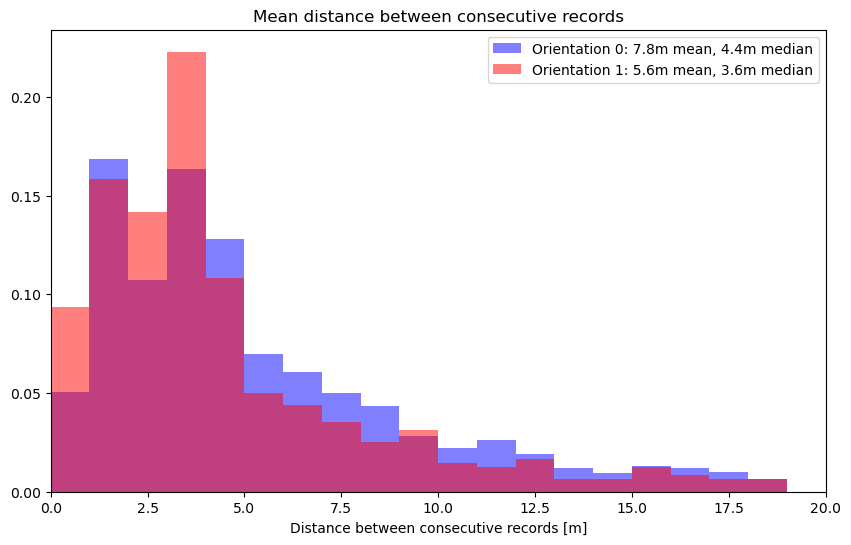

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
dr = np.array([])
orientation = np.array([])
for i, drifter in enumerate(data.keys()):
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    dr = np.append(dr, np.hypot(np.diff(lats)*1852*60, np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)))
    orientation = np.append(orientation, [d[3] for d in data[drifter][:-1]])

for i in range(2):
    dro = dr[orientation==i]
    ax.hist(dro, bins=range(0, 20), lw=3, fc=(i, 0, 1-i, 0.5), density=True, label=f"Orientation {i}: {np.mean(dro):.1f}m mean, {np.median(dro):.1f}m median")
ax.set_xlim([0, 20])
ax.set_title(f"Mean distance between consecutive records")
ax.set_xlabel('Distance between consecutive records [m]');
ax.legend()
plt.show()


Analysis of battery voltage

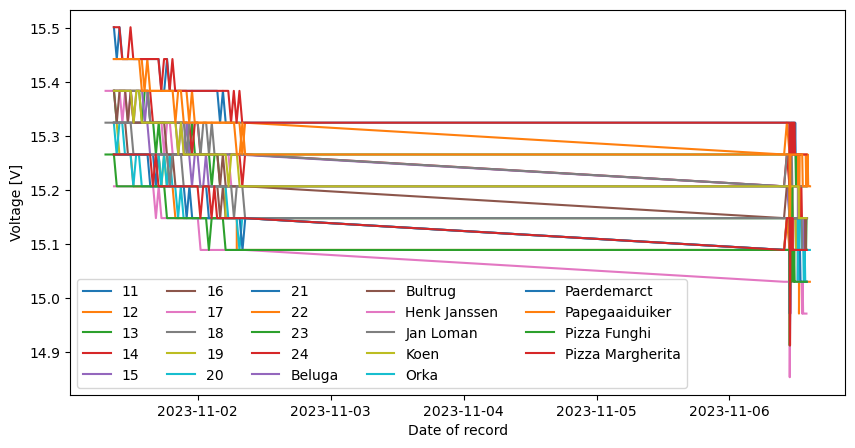

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    voltage = [d[4] for d in data[drifter]]
    ax.plot(times, voltage, label=drifter)
plt.legend(ncol=5)
plt.xlabel('Date of record')
plt.ylabel('Voltage [V]')
plt.show()

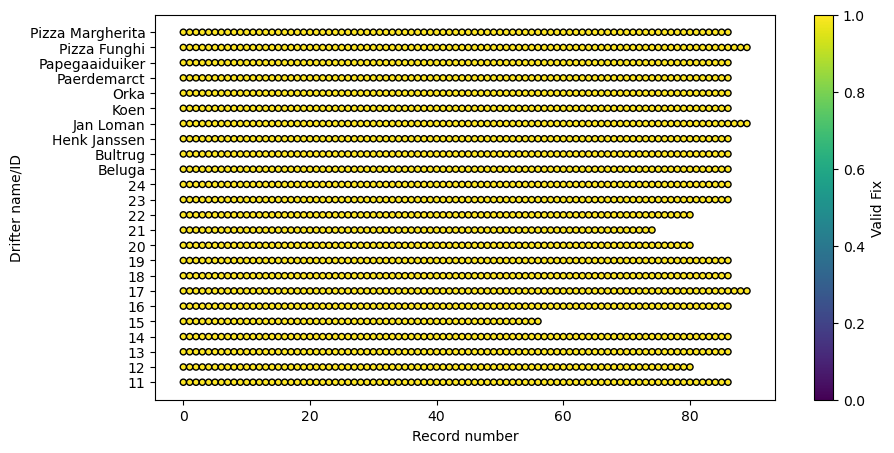

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    validFix = [d[5] for d in data[drifter]]
    plt.scatter(range(len(validFix)), (len(validFix)*[i]), s=20, c=validFix, vmin=0, vmax=1, cmap='viridis', edgecolor='k')
plt.colorbar(label="Valid Fix")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

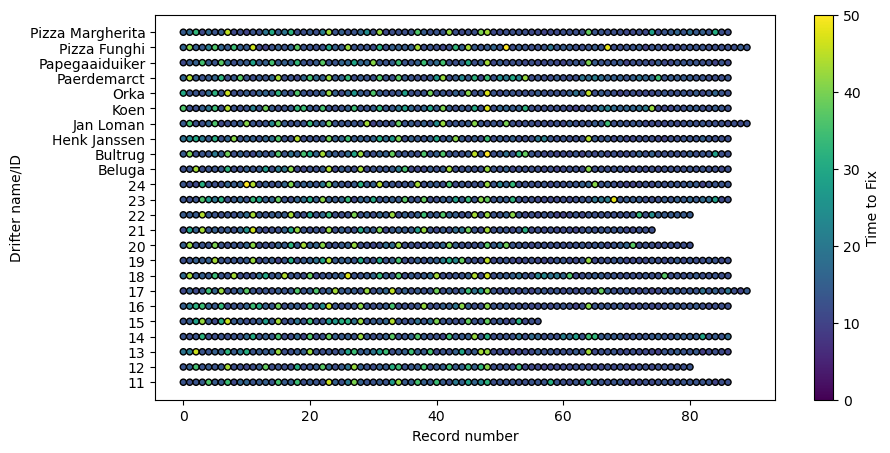

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, drifter in enumerate(data.keys()):
    timetoFix = [d[6] for d in data[drifter]]
    plt.scatter(range(len(timetoFix)), (len(timetoFix)*[i]), s=20, c=timetoFix, vmin=0, vmax=50, cmap='viridis', edgecolor='k')
plt.colorbar(label="Time to Fix")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name/ID')
plt.xlabel('Record number')
plt.show()

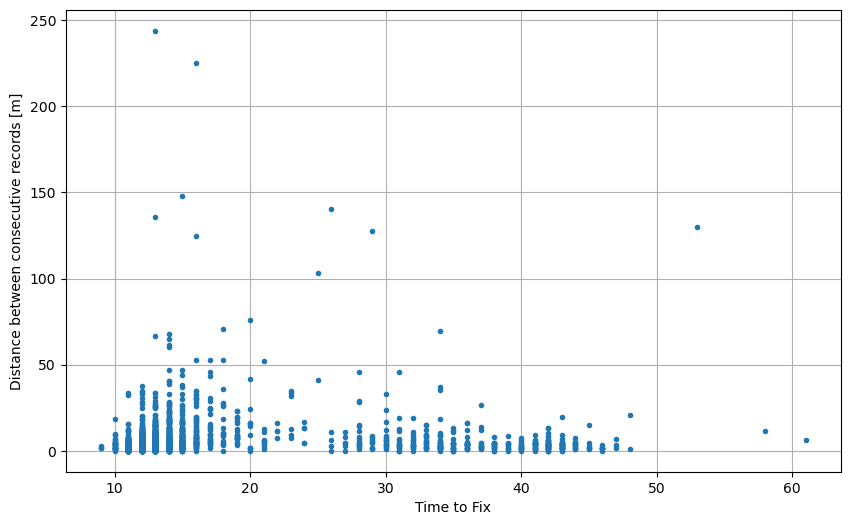

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
dr = np.array([])
timetoFix = np.array([])
for i, drifter in enumerate(data.keys()):
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    dr = np.append(dr, np.hypot(np.diff(lats)*1852*60, np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)))
    timetoFix = np.append(timetoFix, [d[6] for d in data[drifter][:-1]])

plt.plot(timetoFix, dr, '.')
plt.xlabel('Time to Fix')
plt.ylabel('Distance between consecutive records [m]')
plt.grid()
plt.show()
